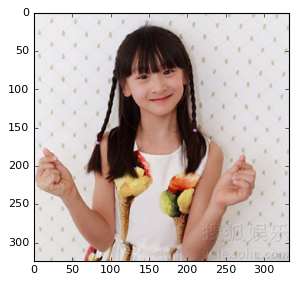

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

pil_im = Image.open('/home/gezi/data/imgs/im2txt/sendie.jpg', 'r')
imshow(np.asarray(pil_im))

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
pil_im = Image.open('/home/gezi/data/imgs/im2txt/sendie.jpg', 'r')
pil_im.show()

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

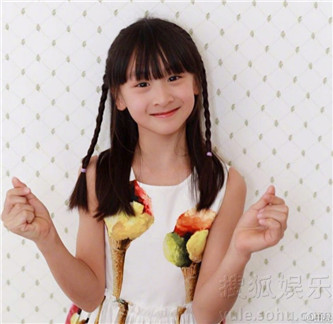

In [4]:
from IPython.display import Image as Image2
Image2('/home/gezi/data/imgs/im2txt/sendie.jpg')

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

import glob, math

import gezi, melt
from deepiu.util import text2ids
from libgezi import utf82gbk, gbk2utf8

tensorflow_version: 1.1.0-rc0


In [6]:
import conf
from conf import TEXT_MAX_WORDS, NUM_RESERVED_IDS, ENCODE_UNK

In [7]:
image_dir = '/home/gezi/data/imgs/im2txt/'

In [8]:
image_model_checkpoint_path = '/home/gezi/data/inceptionv3/inception_v3.ckpt'

In [9]:
image_model = melt.image.ImageModel(image_model_checkpoint_path)

INFO:tensorflow:Restoring image variables from checkpoint file /home/gezi/data/inceptionv3/inception_v3.ckpt
INFO:tensorflow:Restoring parameters from /home/gezi/data/inceptionv3/inception_v3.ckpt


In [10]:
vocab_path = '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt'
text2ids.init(vocab_path)

ENCODE_UNK 1


In [11]:
model_dir = '/home/gezi/new/temp/image-caption/keyword/model/showandtell/'
predictor = melt.Predictor(model_dir)

restore from /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


import graph ok /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000.meta
restore ok /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


In [12]:
def _text2ids(text, max_words):
  word_ids = text2ids.text2ids(text, 
                               seg_method='basic', 
                               feed_single=True, 
                               allow_all_zero=True, 
                               pad=False)
  word_ids = word_ids[:max_words]
  word_ids = gezi.pad(word_ids, max_words, 0)

  return word_ids

/home/gezi/data/imgs/im2txt/usa-campus.jpg


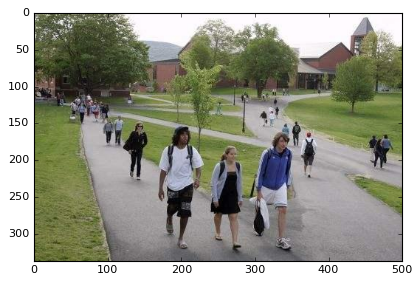

大学/校园/<EOS> 0.00216089 -6.13723616969
公园/散步/<EOS> 0.00194046 -6.24482820953
公园/<EOS> 0.00139609 -6.57407762079
大学/校园/图片/<EOS> 0.00105578 -6.85347513377
大学/校园/环境/<EOS> 0.000725311 -7.2289095559
公园/运动/<EOS> 0.000548478 -7.508363207
公园/健身/<EOS> 0.000513718 -7.57383631206
厦门/大学/<EOS> 0.000462473 -7.67892265058
大学/校园/风光/<EOS> 0.000392867 -7.84204004311
大学/女生/<EOS> 0.00035138 -7.95364096284
/home/gezi/data/imgs/im2txt/usa-class.jpg


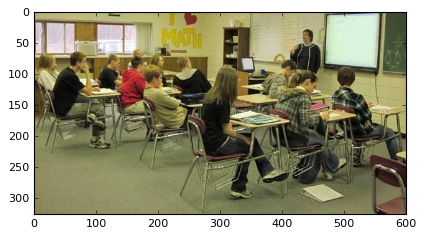

<UNK>/<EOS> 0.00595653 -5.1232676336
咖啡/厅/<EOS> 0.00116129 -6.75822734569
<UNK>/ /<UNK>/<EOS> 0.000898925 -7.01431081742
小/学生/上课/<EOS> 0.000462458 -7.67895411652
老年/人/培训/<EOS> 0.00042597 -7.76114175646
学生/学习/<EOS> 0.000417367 -7.78154420357
咖啡/店/<EOS> 0.000412207 -7.79398537878
咖啡/厅/看书/<EOS> 0.000384247 -7.86422539115
小/学生/学习/<EOS> 0.000350887 -7.95504761067
咖啡/色/<EOS> 0.00023927 -8.33791922582
/home/gezi/data/imgs/im2txt/sendie.jpg


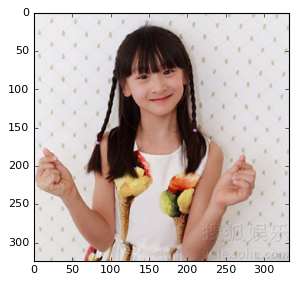

美女/<EOS> 0.00129009 -6.65303948014
性感/<EOS> 0.000570431 -7.4691181342
小/清新/<EOS> 0.000475371 -7.65141532377
刘/诗诗/<EOS> 0.000317494 -8.05505280835
小/蜗牛/<EOS> 0.000296793 -8.12247659574
林/心/如/<EOS> 0.00027535 -8.1974669038
美女/吃/<EOS> 0.00022863 -8.38340379731
日本/<EOS> 0.000224661 -8.40091895369
性感/美女/<EOS> 0.000214746 -8.44605541988
林/志/颖/<EOS> 0.000207903 -8.47843930919
beam_search using time(ms): 5114.79401588
[array([[  3.55075317e-05],
       [  4.03346567e-05],
       [  1.55369220e-02]], dtype=float32)]


In [14]:
def predicts(predictor, image_paths):
  timer = gezi.Timer()
  image_raw = [melt.image.read_image(image_path) for image_path in image_paths]
  image_feature = image_model.process(image_raw)
  
  timer = gezi.Timer()
  texts_list, scores_list = predictor.inference(['beam_text', 'beam_text_score'], 
                                    feed_dict= {
                                      'show_and_tell/model_init_1/image_feature:0': image_feature
                                      })

  for image_path, texts, scores in zip(image_paths, texts_list, scores_list):
    print(image_path)
    image_show(image_path)
    for text, score in zip(texts, scores):
      print(gbk2utf8(text2ids.ids2text(text)), score, math.log(score))

  print('beam_search using time(ms):', timer.elapsed_ms())


  score = predictor.inference(['score'], 
                              feed_dict= {
                                       'show_and_tell/model_init_1/image_feature:0': image_feature,
                                       'show_and_tell/model_init_1/text:0': [_text2ids(utf82gbk('美女'), TEXT_MAX_WORDS)] * len(image_feature)
                                      })
    
  print(score)
    
predicts(predictor, glob.glob(image_dir + '/*.jpg'))
